In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats
from sklearn.metrics import mean_squared_error
from math import sqrt
from random import randint
from matplotlib import pyplot 
from datetime import datetime
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_csv('/content/BTC.csv')
data.isnull().values.any()

False

In [3]:
data.head(10)

,Date,Price,Open,High,Low,Vol.,Change %
0,"May 19, 2021","38,678.4","42,898.3","43,516.6","30,261.7",452.39K,-9.83%
1,"May 18, 2021","42,897.3","43,538.5","45,770.9","42,293.9",154.96K,-1.48%
2,"May 17, 2021","43,541.3","46,424.2","46,545.4","42,201.5",274.76K,-6.21%
3,"May 16, 2021","46,426.4","46,729.3","49,764.3","43,920.8",180.07K,-0.60%
4,"May 15, 2021","46,708.8","49,839.1","50,640.9","46,650.2",131.91K,-6.28%
5,"May 14, 2021","49,839.8","49,704.9","51,459.2","48,874.0",118.84K,0.27%
6,"May 13, 2021","49,704.6","49,398.2","51,337.3","46,331.1",236.71K,0.65%
7,"May 12, 2021","49,384.2","56,694.5","57,938.5","49,187.0",160.74K,-12.90%
8,"May 11, 2021","56,695.7","55,846.1","56,871.1","54,550.4",96.47K,1.52%
9,"May 10, 2021","55,848.9","58,251.2","59,523.9","53,678.3",142.61K,-4.10%


In [4]:
data.describe()

,Date,Price,Open,High,Low,Vol.,Change %
count,3959,3959,3959,3959,3959,3959,3959
unique,3959,3008,3002,2996,3002,3539,1440
top,"Feb 18, 2020",0.1,0.1,0.1,0.1,-,0.00%
freq,1,100,100,97,101,6,425


In [5]:
data['Date'] = pd.to_datetime(data['Date'])
data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2021-05-19,"38,678.4","42,898.3","43,516.6","30,261.7",452.39K,-9.83%
1,2021-05-18,"42,897.3","43,538.5","45,770.9","42,293.9",154.96K,-1.48%
2,2021-05-17,"43,541.3","46,424.2","46,545.4","42,201.5",274.76K,-6.21%
3,2021-05-16,"46,426.4","46,729.3","49,764.3","43,920.8",180.07K,-0.60%
4,2021-05-15,"46,708.8","49,839.1","50,640.9","46,650.2",131.91K,-6.28%


In [6]:
data.tail()

,Date,Price,Open,High,Low,Vol.,Change %
3954,2010-07-22,0.1,0.1,0.1,0.1,2.16K,0.00%
3955,2010-07-21,0.1,0.1,0.1,0.1,0.58K,0.00%
3956,2010-07-20,0.1,0.1,0.1,0.1,0.26K,0.00%
3957,2010-07-19,0.1,0.1,0.1,0.1,0.57K,0.00%
3958,2010-07-18,0.1,0.0,0.1,0.1,0.08K,0.00%


In [7]:
df_train = data[:-int(0.05*len(data))]
df_test = data[-int(0.05*len(data)):]

In [10]:
working_data = data[['Date','Price']]
working_data['Price'] = working_data['Price'].replace({',':''},regex=True).apply(pd.to_numeric)
working_data = working_data.set_index('Date')
working_data = working_data.iloc[::-1]
working_data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Price
Date,
2010-07-18,0.1
2010-07-19,0.1
2010-07-20,0.1
2010-07-21,0.1
2010-07-22,0.1


In [13]:
s = sm.tsa.seasonal_decompose(working_data.Price.values, freq=60)

trace1 = go.Scatter(x = working_data.index ,y = s.trend,mode = 'lines',name = 'Trend',
    line = dict(color = ('rgb(244, 146, 65)'), width = 4))
trace2 = go.Scatter(x = working_data.index,y = s.seasonal,mode = 'lines',name = 'Seasonal',
    line = dict(color = ('rgb(66, 244, 155)'), width = 2))

trace3 = go.Scatter(x = working_data.index,y = s.resid,mode = 'lines',name = 'Residual',
    line = dict(color = ('rgb(209, 244, 66)'), width = 2))

trace4 = go.Scatter(x = working_data.index,y = s.observed,mode = 'lines',name = 'Observed',
    line = dict(color = ('rgb(66, 134, 244)'), width = 2))

trace = [trace1, trace2, trace3, trace4]
layout = dict(title='Seasonal Decomposition', xaxis=dict(title='Time'), yaxis=dict(title='Price'))
fig = dict(data = trace, layout=layout)
py.iplot(fig, filename='seasonal_decomposition')

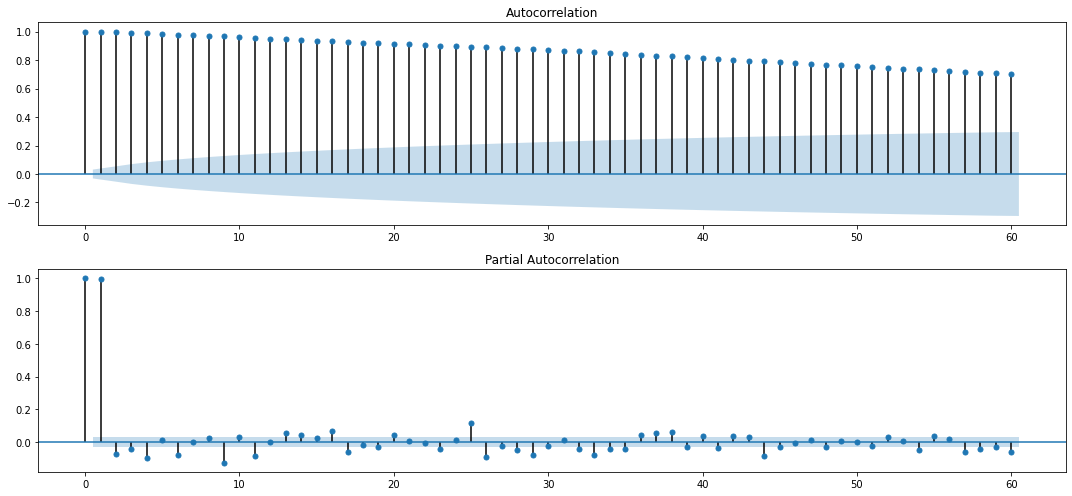

In [17]:
plt.figure(figsize=(15,7))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(working_data.Price.values.squeeze(), lags=60, ax=ax)
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(working_data.Price.values.squeeze(), lags=60, ax=ax)
plt.tight_layout()
plt.show()